# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression
import random
random.seed(10)

In [29]:
df = pd.read_csv('last_csv.csv',index_col=[0])

# Acquire
> * Data acquired from:
    - https://overthecap.com/position/quarterback
    - https://overthecap.com/contract-history/quarterback
    - https://nextgenstats.nfl.com/stats/passing/2022/REG/all#yards
    - https://www.pro-football-reference.com/years/2022/passing.htm
> * Combined multiple csv's and added additionals column to give percentage of wins and losses
> * Cached combined file to local csv
> * Each row player stats throughout a specific year

# Prepare
> * Visualized full dataset for univariate exploration
      * Histograms different types of distributions

> * Verified datatypes
> * Corrected column names
> * Checked for nulls and removed them
> * Split the data, stratifying on target variable

In [30]:
df.head()

,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,...,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game
name,,,,,,,,,,,,,,,,,,,,,
Blaine Gabbert,JAX,2011,15.0,210.0,413.0,50.8,2214.0,5.4,12.0,11.0,...,10,0.0,0.0,0.0,0.0,0.0,0.27,0.67,0.80,2.67
Blaine Gabbert,JAX,2012,10.0,162.0,278.0,58.3,1662.0,6.0,9.0,6.0,...,9,0.0,0.0,0.0,0.0,0.0,0.10,0.90,0.90,2.20
Blaine Gabbert,SF,2015,8.0,178.0,282.0,63.1,2031.0,7.2,10.0,7.0,...,5,0.0,0.0,0.0,0.0,0.0,0.38,0.62,1.25,3.12
Blaine Gabbert,SF,2016,6.0,91.0,160.0,56.9,925.0,5.8,5.0,6.0,...,4,0.0,0.0,0.0,0.0,0.0,0.17,0.67,0.83,1.83
Blaine Gabbert,ARI,2017,5.0,95.0,171.0,55.6,1086.0,6.4,6.0,6.0,...,3,0.0,0.0,0.0,0.0,0.0,0.40,0.60,1.20,4.60


In [31]:
train, validate, test = wrangle.split_data(df)
columns_list, target, corr_test = wrangle.get_target_and_columns(df, train)

# Univariate Analysis

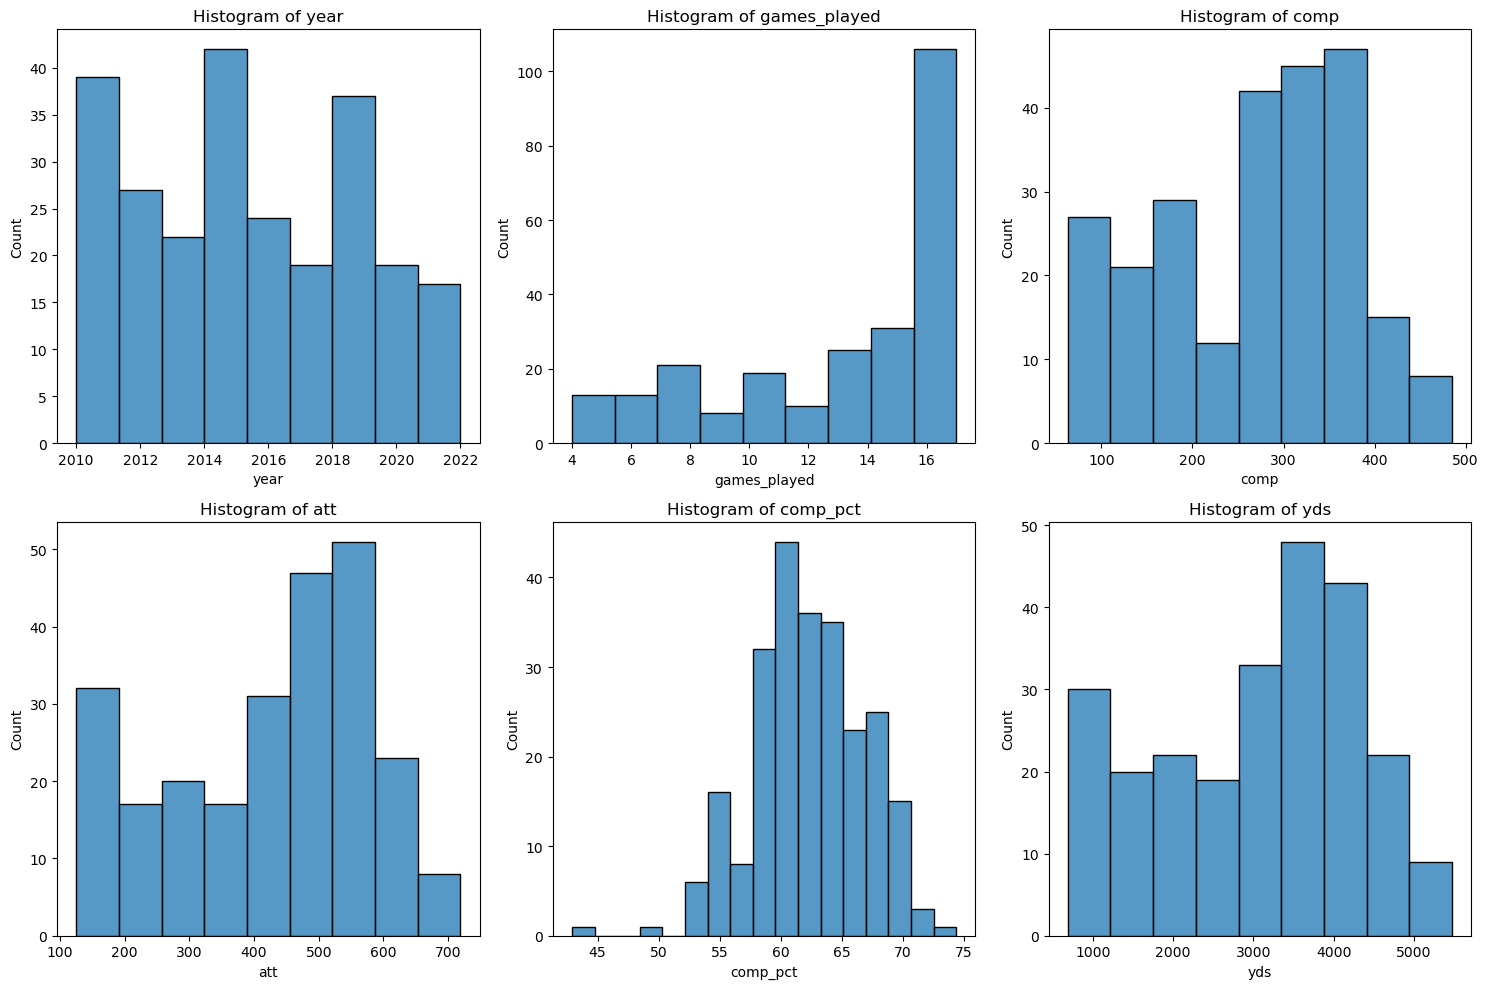

In [32]:
wrangle.new_visual_univariate_findings(train)

In [33]:
wrangle.univariate_findings()

,Feature,Distribution
0,games_played,left_skewed
1,comp,non-symmetric bimodal
2,att,non-symmetric bimodal
3,comp_pct,normally
4,yds,non-symmetric bimodal
5,avg_yds_per_att,normally
6,td,right-skewed
7,int,right-skewed
8,pass_rating,normally
9,rush_att,right-skewed


# Univariate Exploration Summary


# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

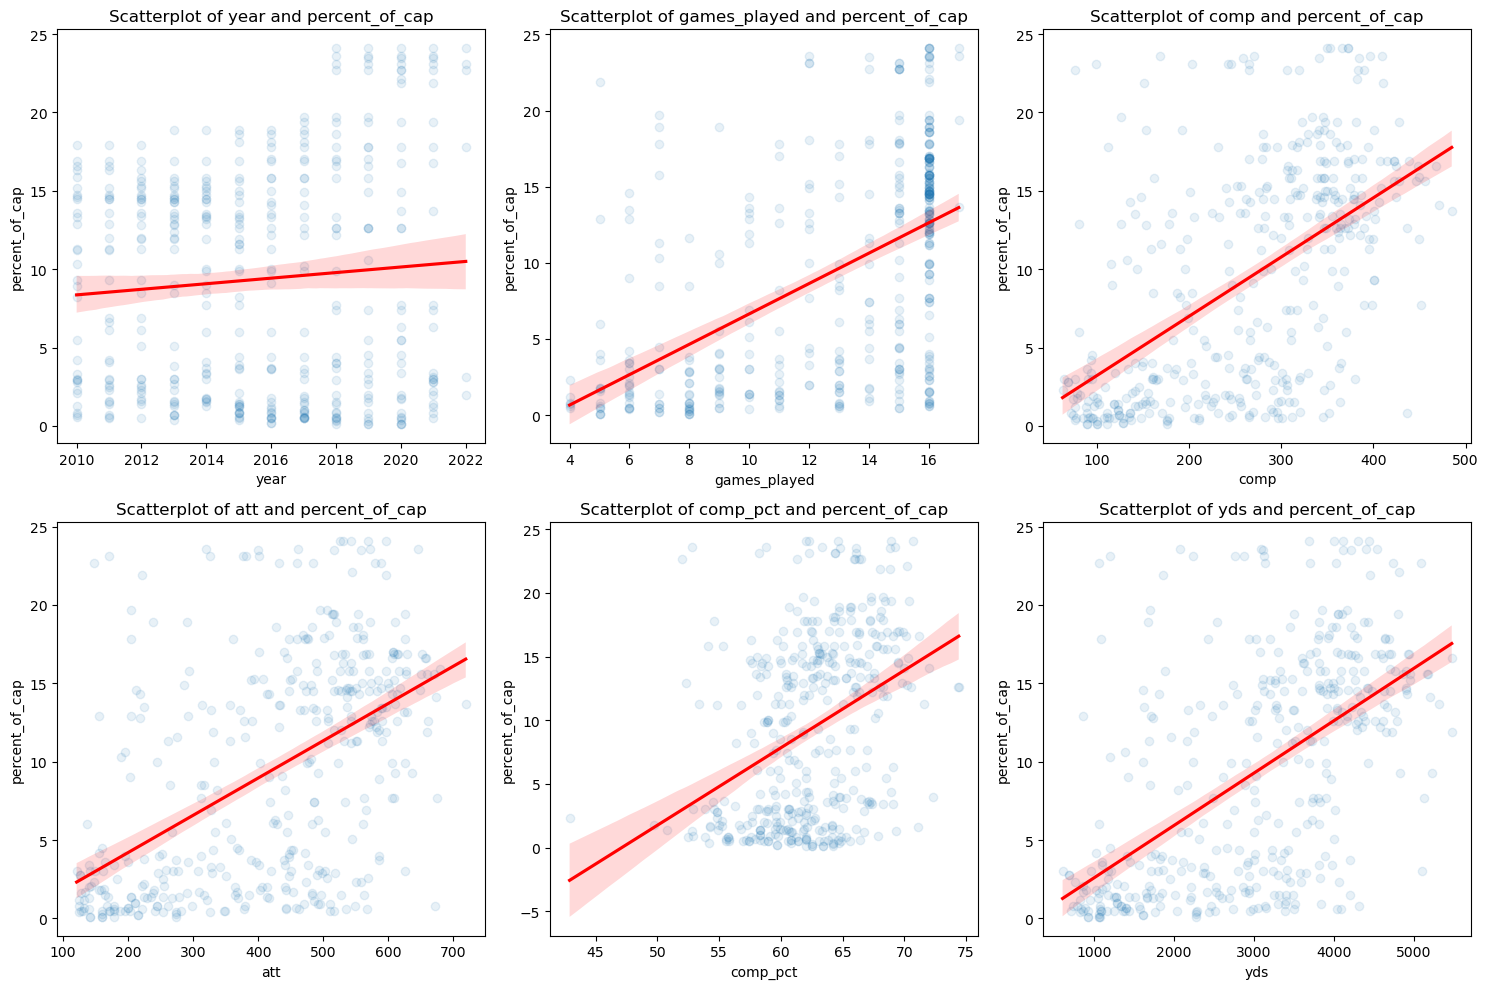

In [34]:
wrangle.new_visual_multivariate_findings(df, target)

# Bivariate Exploration Summary


In [35]:
wrangle.get_explore_data(columns_list, corr_test)

,Features,Correlation,Moving Forward
0,year,Negative,No
1,games_played,Positive,No
2,comp,Negative,No
3,att,Positive,No
4,comp_pct,Positive,No
5,yds,Positive,No
6,avg_yds_per_att,Positive,No
7,td,Positive,No
8,int,Positive,Yes
9,pass_rating,Positive,Yes


# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [36]:
corr_test.sort_values(by= 'p')

,feature,r,p,Moving Forward
36,win,0.620792,1.323882e-27,Yes
35,td,0.601081,1.486490e-25,Yes
34,yds,0.574484,5.292411e-23,Yes
33,fir_dn_throws,0.563590,5.050176e-22,Yes
32,QBR,0.563277,5.381325e-22,Yes
31,comp,0.556350,2.160952e-21,Yes
30,games_played,0.554204,3.302561e-21,Yes
29,win_perc,0.550116,7.346897e-21,Yes
28,pass_rating,0.540268,4.823076e-20,Yes
27,att,0.525681,7.010624e-19,Yes


In [37]:
columns_list = corr_test.feature[corr_test.p < .05].to_list()

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with

In [38]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

,feature,r,p,Moving Forward
0,win,0.620792,1.323882e-27,Yes
1,td,0.601081,1.486490e-25,Yes
2,yds,0.574484,5.292411e-23,Yes
3,fir_dn_throws,0.563590,5.050176e-22,Yes
4,QBR,0.563277,5.381325e-22,Yes
5,comp,0.556350,2.160952e-21,Yes
6,games_played,0.554204,3.302561e-21,Yes
7,win_perc,0.550116,7.346897e-21,Yes
8,pass_rating,0.540268,4.823076e-20,Yes
9,att,0.525681,7.010624e-19,Yes


In [39]:
# splitting the data in its respective catagory
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [40]:
# Scaling on selected features to be sent into model
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

In [41]:
# Running the data through the models
df1, df2, df3,predict_linear, feature_weights, predict_linear_test  = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [42]:
train['predicted'] = predict_linear.tolist()

# Looking at predicted vs actual for a given year

In [43]:
pd.set_option('display.max_rows', None)
train[['predicted','percent_of_cap', 'year']].sort_values(by=['percent_of_cap','year'], ascending = False)

,predicted,percent_of_cap,year
name,,,
Aaron Rodgers,9.621794,24.1,2022
Aaron Rodgers,19.618208,24.1,2020
Aaron Rodgers,16.053070,24.1,2019
Josh Allen,19.822399,23.6,2021
Josh Allen,18.244566,23.6,2020
Josh Allen,12.567256,23.6,2019
Josh Allen,9.778426,23.6,2018
Russell Wilson,18.218717,23.5,2019
Lamar Jackson,18.995525,23.1,2022


## Train Data

In [17]:
# Models on the training data
df1

,model_train,rmse,r2
0,baseline,7.105761,0.000000
1,ordinary least squared(OLS),4.714900,0.559725
2,lasso lars(lars),6.552030,0.149781
3,Polynomial Regression(poly2),0.032821,0.999979
4,Generalized Linear Model (GLM),5.432543,0.415499
5,Random Forest Regressor,1.859801,0.931497


## Validate Data

In [18]:
# Models on the validate data
df2

,model_validate,rmse,r2
0,baseline,7.105761e+00,0.000000e+00
1,ordinary least squared(OLS),5.261772e+00,4.079147e-01
2,lasso lars(lars),6.701426e+00,3.959454e-02
3,Polynomial Regression(poly2),2.385521e+06,-1.216989e+11
4,Generalized Linear Model (GLM),5.457471e+00,3.630533e-01
5,Random Forest Regressor,4.860596e+00,4.947582e-01


## Test Data

In [19]:
# Model on the unseen test data
df3

,model_validate,rmse,r2
0,baseline,7.105761,0.000000
1,ordinary least squared(OLS),5.735874,0.434417


# Using fold method for splitting data

In [20]:
# Running the data through the models with the new train, test method.
master_df,best_parameters = wrangle.run_fold(df, columns_list, target)

In [21]:
master_df

,alpha,fit_intercept,verbose,score,model,n_jobs,link
2,1.0,False,True,5.858883,lars,NaN,NaN
3,1.0,False,False,5.858883,lars,NaN,NaN
6,2.0,False,True,6.514026,lars,NaN,NaN
7,2.0,False,False,6.514026,lars,NaN,NaN
0,1.0,True,True,6.726647,lars,NaN,NaN
1,1.0,True,False,6.726647,lars,NaN,NaN
76,20.0,True,True,7.127609,lars,NaN,NaN
32,9.0,True,True,7.127609,lars,NaN,NaN
33,9.0,True,False,7.127609,lars,NaN,NaN
36,10.0,True,True,7.127609,lars,NaN,NaN


In [22]:
# Running the test data through the models
best_parameters

,model_validate,rmse,r2
0,baseline,7.140633,0.00000
1,lasso lars(lars),6.258431,0.26245


# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 5.479861e+00 in validate
> - Our unseen test data beat baseline

# Conclusion

> - The different columns were distributed in differently see above for a chart

### Features that were statistically significant

In [23]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

,feature,r,p,target
0,win,0.620792,1.323882e-27,percent_of_cap
1,td,0.601081,1.486490e-25,percent_of_cap
2,yds,0.574484,5.292411e-23,percent_of_cap
3,fir_dn_throws,0.563590,5.050176e-22,percent_of_cap
4,QBR,0.563277,5.381325e-22,percent_of_cap
5,comp,0.556350,2.160952e-21,percent_of_cap
6,games_played,0.554204,3.302561e-21,percent_of_cap
7,win_perc,0.550116,7.346897e-21,percent_of_cap
8,pass_rating,0.540268,4.823076e-20,percent_of_cap
9,att,0.525681,7.010624e-19,percent_of_cap


### NLP Insights

In [24]:
# import w_wrangle as wran

In [25]:
# #Acquire and Prepare

# comm = wran.acquire_commentary()
# comm.player_commentary = comm.player_commentary.apply(wran.clean_strings)

# comm.head()

In [26]:
# # Get grams to put into visualizations

# unigram_high_words, unigram_mid_words, unigram_low_words, bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words = wran.get_grams(comm)

In [27]:
# #Unigram visualizations

# wran.viz_unigrams(unigram_high_words, unigram_mid_words, unigram_low_words)

In [28]:
# #Bigram visualizations

# wran.viz_bigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

In [29]:
# #Trigram visualizations

# wran.viz_trigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

### Sentiment Analysis

In [30]:
# #Get Sentiment Scores

# wran.get_sia_scores(comm)

### Key Findings

- 'Career' is not mentioned in low-percentage caps.
- High-percentage caps have a larger set of unique words. A lot of them could be comparisons to "the Greats" (Mahomes, Hurts, Wentz, Brady).
- Low-percentage caps talked a lot about backup (presumably quarterbacks), field, and run. Mention of "Jets" indicate historically low-percentage cap quarterbacks.
- The conversation always revolves around winning the Super Bowl across all three cap tiers.
- High-percentage caps talk about the Super Bowl and their performance in it significantly more. The focus of mid and low percentage caps also speak about their performance in the NFC.
- Sentiment scores are very high, if not maxed out, across all tiers. Only the low-percentage cap quarterbacks had a slightly lower score.

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback

In [31]:
len(feature_weights)

29

In [32]:
len(X_train.select_dtypes(exclude="object").columns)

29

In [33]:
train.columns

Index(['team', 'year', 'games_played', 'comp', 'att', 'comp_pct', 'yds',
       'avg_yds_per_att', 'td', 'int', 'pass_rating', 'rush_att', 'rush_yds',
       'rush_avg', 'rush_td', 'full_name', 'year_signed', 'percent_of_cap',
       'Player', 'Age', 'td_perc', 'int_perc', 'fir_dn_throws', 'lng_comp',
       'yds_per_comp', 'yds_per_gm', 'QBR', 'Sk', '4QC', 'GWD', 'win', 'loss',
       'wild_card', 'div_rnd', 'conf_rnd', 'superbowl', 'superbowl_win',
       'win_perc', 'loss_perc', 'td_per_game', 'sk_per_game', 'predicted'],
      dtype='object')

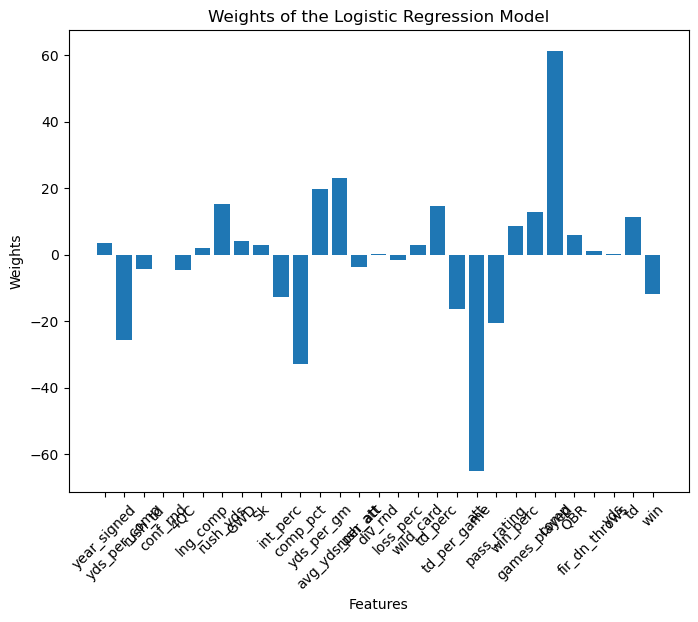

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(X_train.select_dtypes(exclude="object").columns, feature_weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights of the Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (29,) and arg 3 with shape (6,).

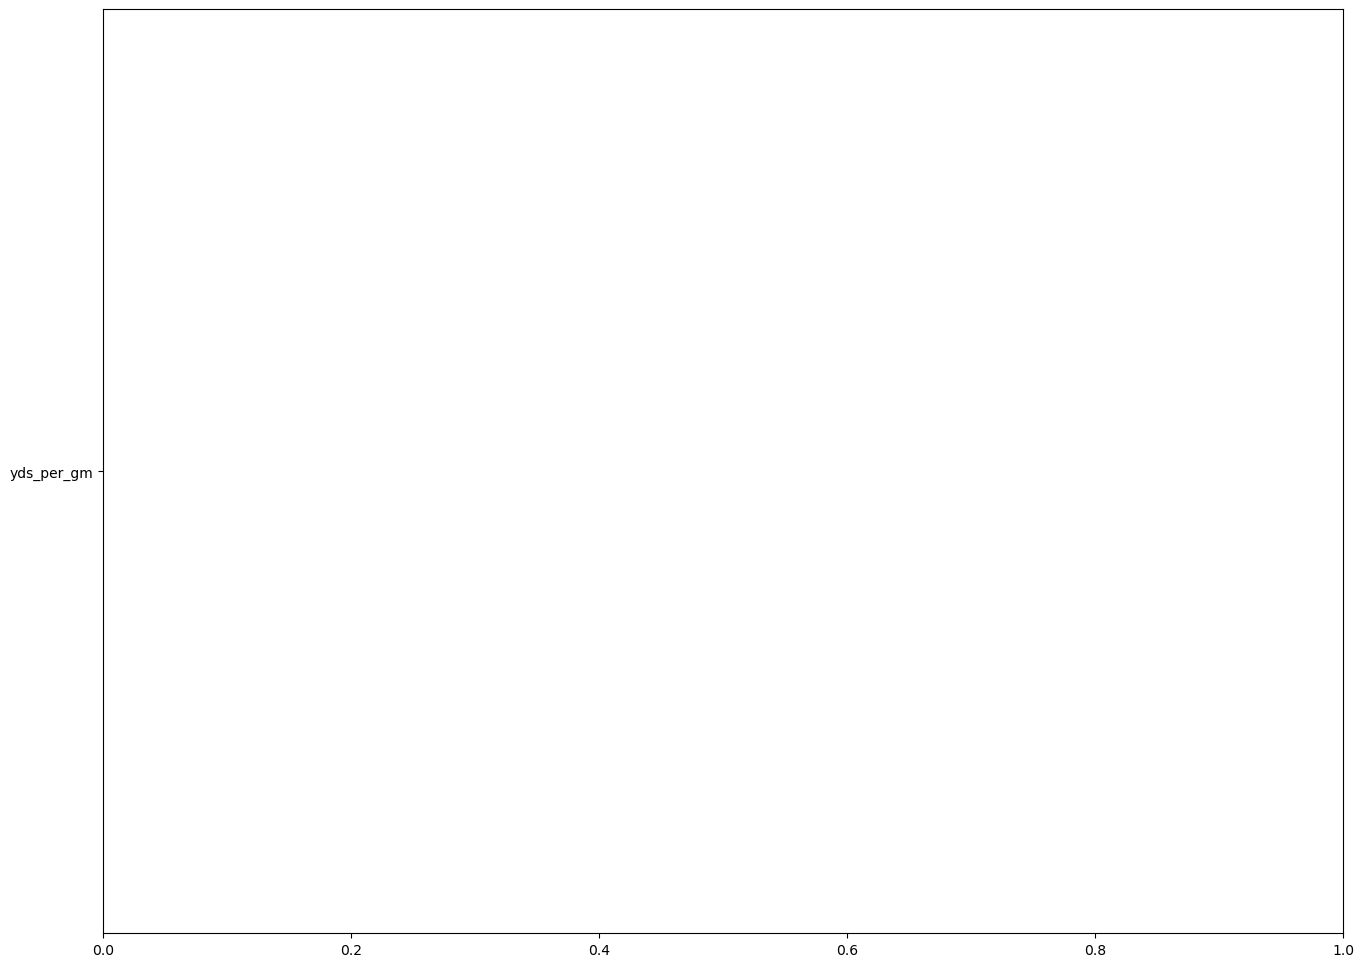

In [122]:
# feature_names = X_train.select_dtypes(exclude="object").columns

# sorted_indices = np.argsort(feature_weights)
# sorted_feature_names = [feature_names[i] for i in sorted_indices]
# sorted_weights = feature_weights[sorted_indices]
# plt.figure(figsize=(16, 12))

# top_three = sorted_feature_names[-3:]
# bottom_three = sorted_feature_names[:3]
# top_bottom_features = top_three + bottom_three

# plt.barh(top_bottom_features, sorted_weights)
# plt.xlabel('Features')
# plt.ylabel('Weights')
# plt.title('Weights of the Logistic Regression Model (Sorted)')

# plt.hlines(top_three, xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='-', label='Top 3 Features')
# plt.hlines(bottom_three, xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', label='Bottom 3 Features')

# plt.show()

In [ ]:
sorted_feature_names[3]

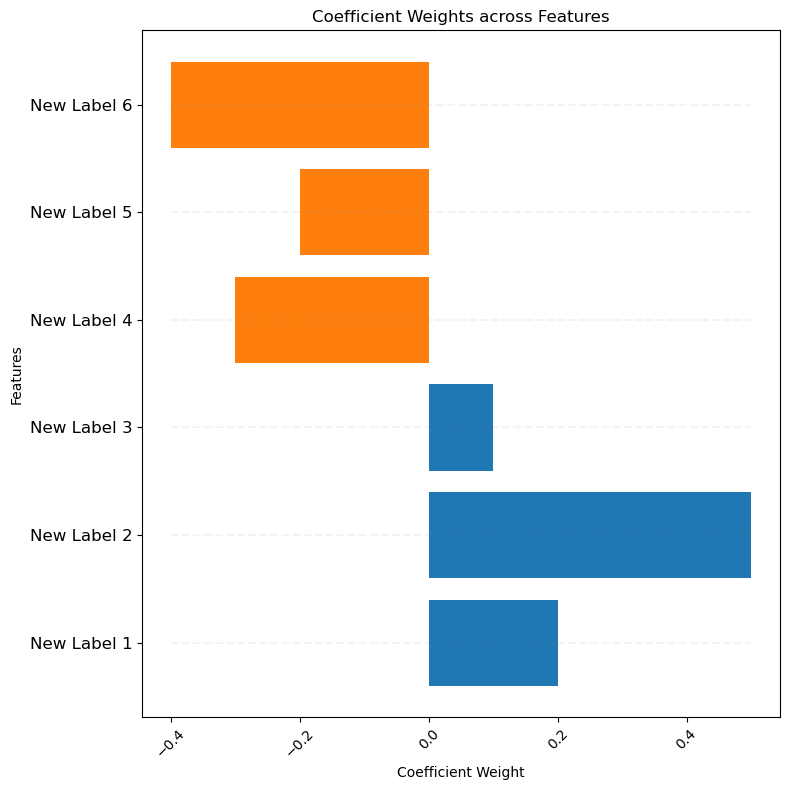

In [130]:
# Assuming you have already defined sorted_feature_names and sorted_weights
sorted_feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
sorted_weights = np.array([0.2, 0.5, 0.1, -0.3, -0.2, -0.4])

plt.figure(figsize=(8, 8))

plt.barh(sorted_feature_names[:3], sorted_weights[:3])
plt.barh(sorted_feature_names[-3:], sorted_weights[-3:])
plt.xlabel('Coefficient Weight')
plt.ylabel('Features')
plt.title('Coefficient Weights across Features')

# Set custom y-axis tick labels
custom_y_tick_labels = ['New Label 1', 'New Label 2', 'New Label 3', 'New Label 4', 'New Label 5', 'New Label 6']
plt.yticks(np.arange(len(sorted_feature_names)), custom_y_tick_labels, fontsize=12)  # Change fontsize as desired

plt.xticks(rotation=45)
plt.hlines(sorted_feature_names[:3], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha=0.09)
plt.hlines(sorted_feature_names[-3:], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha=0.09)

plt.tight_layout()  # To adjust plot margins for better visibility

plt.show()

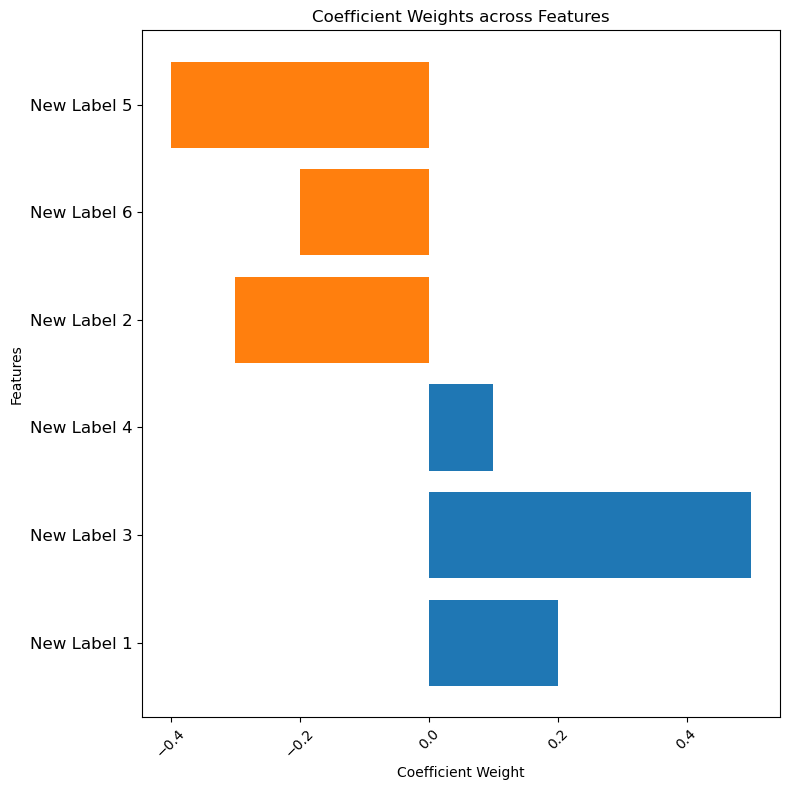

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined feature_names, sorted_weights, and sorted_feature_names
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
sorted_weights = np.array([0.2, 0.5, 0.1, -0.3, -0.2, -0.4])
sorted_feature_names = ['Feature 1', 'Feature 3', 'Feature 4', 'Feature 2', 'Feature 6', 'Feature 5']

# Create a dictionary to map old labels to new labels
new_labels_map = {
    'Feature 1': 'New Label 1',
    'Feature 2': 'New Label 2',
    'Feature 3': 'New Label 3',
    'Feature 4': 'New Label 4',
    'Feature 5': 'New Label 5',
    'Feature 6': 'New Label 6'
}

plt.figure(figsize=(8, 8))

# Plot the bars with the original feature names but updated labels
plt.barh(sorted_feature_names[:3], sorted_weights[:3])
plt.barh(sorted_feature_names[-3:], sorted_weights[-3:])
plt.xlabel('Coefficient Weight')
plt.ylabel('Features')
plt.title('Coefficient Weights across Features')
plt.xticks(rotation=45)

# Map old labels to new labels using the dictionary and set custom y-axis tick labels
custom_y_ticks = [new_labels_map[label] if label in new_labels_map else label for label in sorted_feature_names]
plt.yticks(np.arange(len(sorted_feature_names)), custom_y_ticks, fontsize=12)

plt.tight_layout()  # To adjust plot margins for better visibility

plt.show()


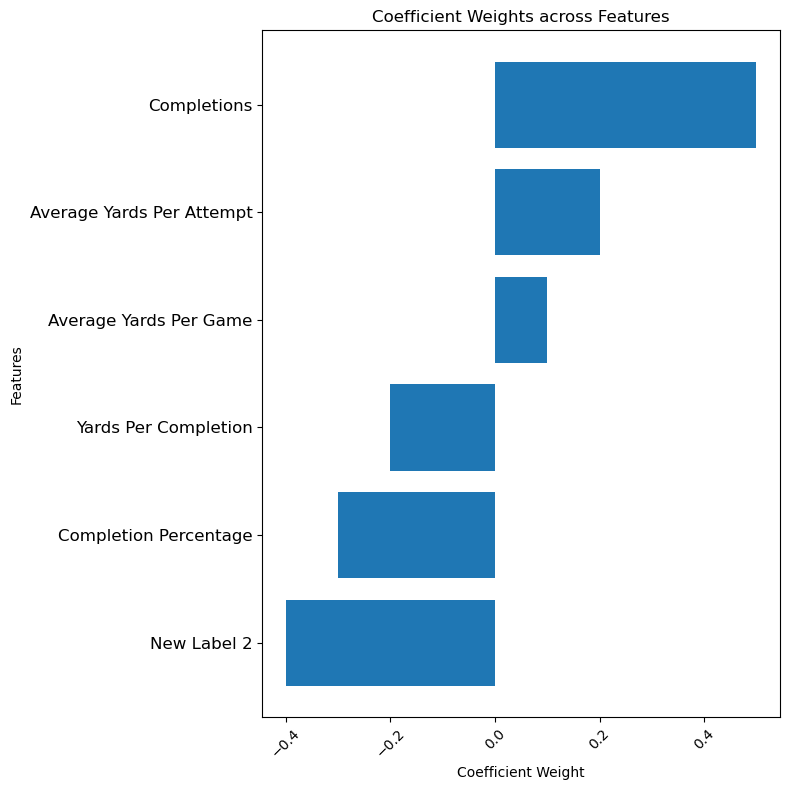

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined sorted_feature_names and sorted_weights
sorted_feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
sorted_weights = np.array([0.2, 0.5, 0.1, -0.3, -0.2, -0.4])

# Create a dictionary to map old labels to new labels
new_labels_map = {
    'Feature 1': 'Completion Percentage',
    'Feature 2': 'New Label 2',
    'Feature 3': 'Yards Per Completion',
    'Feature 4': 'Average Yards Per Attempt',
    'Feature 5': 'Average Yards Per Game',
    'Feature 6': 'Completions'
}

# Sort the data based on coefficient weights from greatest to least
sorted_indices = np.argsort(sorted_weights)
sorted_feature_names = [sorted_feature_names[i] for i in sorted_indices][::-1]  # Reverse the order
sorted_weights = sorted_weights[sorted_indices][::1]  # Reverse the order

plt.figure(figsize=(8, 8))

# Plot the bars in the reversed order (from least to greatest)
plt.barh(sorted_feature_names, sorted_weights)
plt.xlabel('Coefficient Weight')
plt.ylabel('Features')
plt.title('Coefficient Weights across Features')
plt.xticks(rotation=45)

# Map old labels to new labels using the dictionary and set custom y-axis tick labels
custom_y_ticks = [new_labels_map[label] if label in new_labels_map else label for label in sorted_feature_names]
plt.yticks(np.arange(len(sorted_feature_names)), custom_y_ticks, fontsize=12)

plt.tight_layout()  # To adjust plot margins for better visibility

plt.show()





In [153]:
new = ['Attempts', 'Completion Percentage', 'Yards Per Completion', 'Yards Per Game', 'Average Yards Per Attempt', 'Completions']

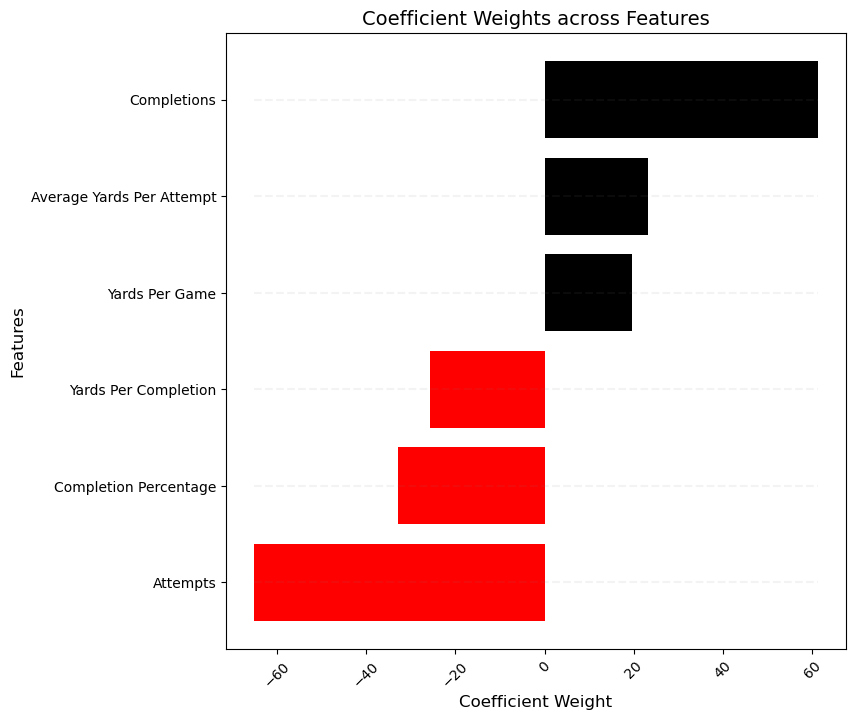

In [161]:
feature_names = X_train.select_dtypes(exclude="object").columns

sorted_indices = np.argsort(feature_weights)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_weights = feature_weights[sorted_indices]
plt.figure(figsize=(8, 8))

plt.barh(sorted_feature_names[:3], sorted_weights[:3], color='red')
plt.barh(sorted_feature_names[-3:], sorted_weights[-3:], color='black')
plt.xlabel('Coefficient Weight', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Coefficient Weights across Features', fontsize=14)
plt.xticks(rotation=45)
plt.hlines(sorted_feature_names[:3], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha = .09)
plt.hlines(sorted_feature_names[-3:], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha = .09)
custom_y_ticks = sorted_feature_names[:3] + sorted_feature_names[-3:]

plt.yticks(custom_y_ticks, fontsize=10)
ax = plt.gca()
ax.set_yticklabels(new, fontsize=10)
plt.show()

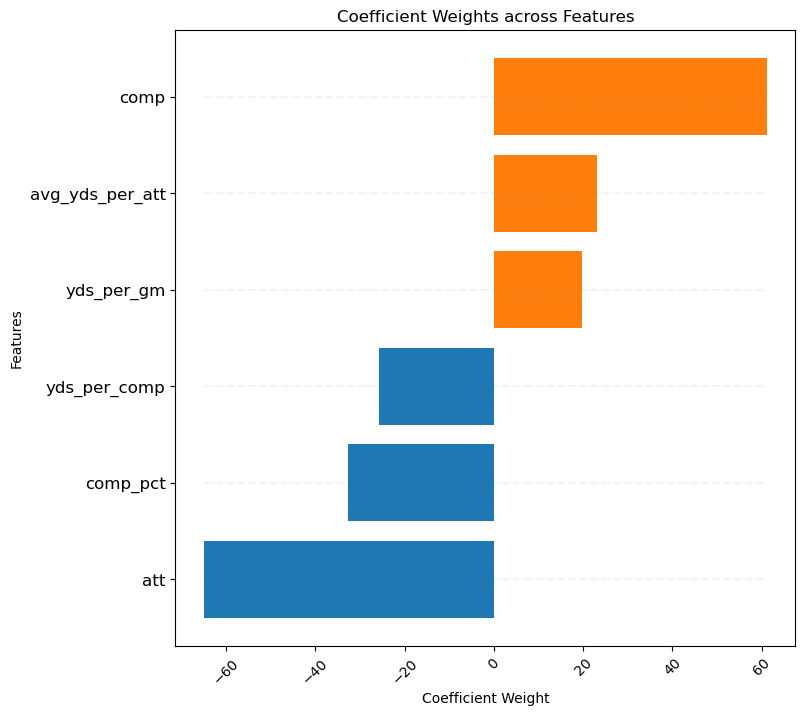

In [152]:
feature_names = X_train.select_dtypes(exclude="object").columns

sorted_indices = np.argsort(feature_weights)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_weights = feature_weights[sorted_indices]
plt.figure(figsize=(8, 8))

plt.barh(sorted_feature_names[:3], sorted_weights[:3])
plt.barh(sorted_feature_names[-3:], sorted_weights[-3:])
plt.xlabel('Coefficient Weight')
plt.ylabel('Features')
plt.title('Coefficient Weights across Features')
plt.xticks(rotation=45)
plt.hlines(sorted_feature_names[:3], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha = .09)
plt.hlines(sorted_feature_names[-3:], xmin=min(sorted_weights), xmax=max(sorted_weights), color='grey', linestyle='--', alpha = .09)
custom_y_ticks = sorted_feature_names[:3] + sorted_feature_names[-3:]

plt.yticks(custom_y_ticks, fontsize=12)

plt.show()

In [ ]:
columns_list.append('win')

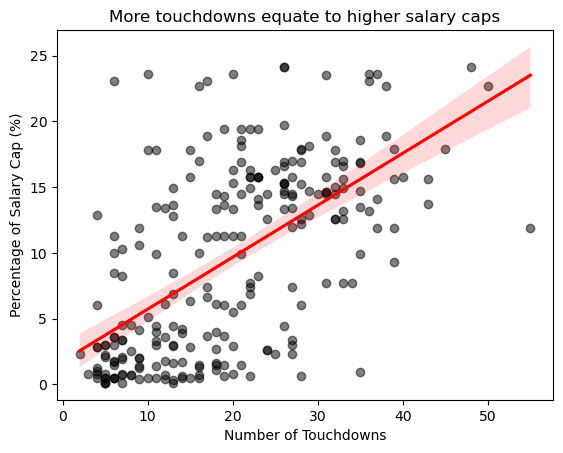

In [121]:
sns.regplot(data = train, x = 'td', y = target, scatter_kws={'alpha': 0.5, 'color':'black'}, line_kws={'color': 'red'})
plt.xlabel('Number of Touchdowns')
plt.title('More touchdowns equate to higher salary caps')
plt.ylabel('Percentage of Salary Cap (%)')
plt.show()

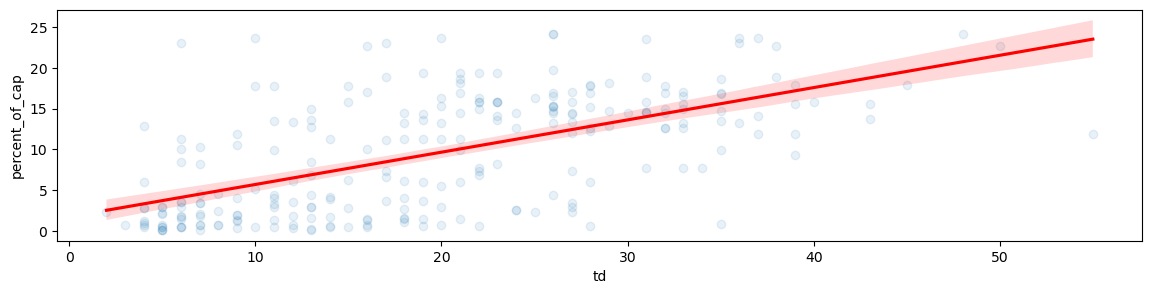

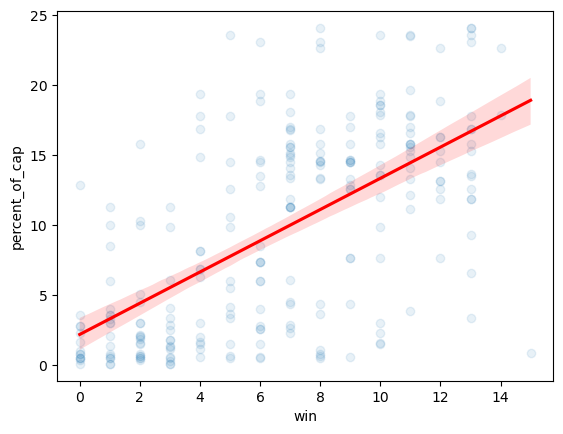

In [36]:
wrangle.correlation_charts(train,['td','win'], target)


In [47]:
pd.set_option('display.max_columns', None)

In [48]:


train



,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game,predicted
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blake Bortles,JAX,2014,14.0,280.0,475.0,58.9,2907.0,6.1,11.0,17.0,69.51,56.0,419.0,7.5,0.0,Blake Bortles,2014,9.9,Blake Bortles,22,2.3,3.6,136,63,10.4,207.7,28.000000,55,1.0,1.0,3,10,0.0,0.0,0.0,0.0,0.0,0.21,0.71,0.79,3.93,8.702922
Chad Henne,JAX,2013,15.0,305.0,503.0,60.6,3241.0,6.4,13.0,14.0,76.48,27.0,77.0,2.9,0.0,Chad Henne,2014,3.0,Chad Henne,28,2.6,2.8,152,62,10.6,216.1,34.900000,38,1.0,1.0,4,9,0.0,0.0,0.0,0.0,0.0,0.27,0.60,0.87,2.53,5.927772
Aaron Rodgers,GB,2012,16.0,371.0,552.0,67.2,4295.0,7.8,39.0,8.0,108.02,54.0,259.0,4.8,2.0,Aaron Rodgers,2013,17.9,Aaron Rodgers,29,7.1,1.4,215,73,11.6,268.4,71.200000,51,2.0,3.0,11,5,1.0,1.0,0.0,0.0,0.0,0.69,0.31,2.44,3.19,18.204765
Jameis Winston,TB,2017,13.0,282.0,442.0,63.8,3504.0,7.9,19.0,11.0,92.24,33.0,135.0,4.1,1.0,Jameis Winston,2020,0.6,Jameis Winston,23,4.3,2.5,185,70,12.4,269.5,52.000000,33,2.0,2.0,3,10,0.0,0.0,0.0,0.0,0.0,0.23,0.77,1.46,2.54,9.533921
Trevor Siemian,DEN,2016,14.0,289.0,486.0,59.5,3401.0,7.0,18.0,10.0,84.57,28.0,57.0,2.0,0.0,Trevor Siemian,2019,1.1,Trevor Siemian,25,3.7,2.1,155,76,11.8,242.9,49.700000,31,3.0,2.0,8,6,0.0,0.0,0.0,0.0,0.0,0.57,0.43,1.29,2.21,7.384098
Jay Cutler,CHI,2011,10.0,182.0,314.0,58.0,2319.0,7.4,13.0,7.0,85.67,18.0,56.0,3.1,1.0,Jay Cutler,2014,13.6,Jay Cutler,28,4.1,2.2,107,56,12.7,231.9,60.500000,23,1.0,1.0,7,3,0.0,0.0,0.0,0.0,0.0,0.70,0.30,1.30,2.30,6.349205
Matt Ryan,ATL,2012,16.0,422.0,615.0,68.6,4719.0,7.7,32.0,14.0,99.10,34.0,141.0,4.1,1.0,Matt Ryan,2013,16.9,Matt Ryan,27,5.2,2.3,248,80,11.2,294.9,71.600000,28,4.0,6.0,13,3,1.0,1.0,1.0,0.0,0.0,0.81,0.19,2.00,1.75,16.795016
Geno Smith,NYJ,2013,16.0,247.0,443.0,55.8,3046.0,6.9,12.0,21.0,66.47,72.0,366.0,5.1,6.0,Geno Smith,2013,0.7,Geno Smith,23,2.7,4.7,148,69,12.3,190.4,41.000000,43,2.0,5.0,8,8,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.75,2.69,6.465608
Tony Romo,DAL,2011,16.0,346.0,522.0,66.3,4184.0,8.0,31.0,10.0,102.53,22.0,46.0,2.1,1.0,Tony Romo,2013,14.6,Tony Romo,31,5.9,1.9,203,77,12.1,261.5,69.000000,36,4.0,4.0,8,8,0.0,0.0,0.0,0.0,0.0,0.50,0.50,1.94,2.25,10.314240


In [51]:
train[train.index =="Josh Allen"]

,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap,Player,Age,td_perc,int_perc,fir_dn_throws,lng_comp,yds_per_comp,yds_per_gm,QBR,Sk,4QC,GWD,win,loss,wild_card,div_rnd,conf_rnd,superbowl,superbowl_win,win_perc,loss_perc,td_per_game,sk_per_game,predicted
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Josh Allen,BUF,2021,17.0,409.0,646.0,63.3,4407.0,6.8,36.0,15.0,92.17,122.0,763.0,6.3,6.0,Josh Allen,2021,23.6,Josh Allen,25,5.6,2.3,234,61,10.8,259.2,60.7,26,0.0,0.0,11,6,1.0,1.0,0.0,0.0,0.0,0.65,0.35,2.12,1.53,19.822399
Josh Allen,BUF,2018,12.0,169.0,320.0,52.8,2074.0,6.5,10.0,12.0,67.89,89.0,631.0,7.1,8.0,Josh Allen,2018,23.6,Josh Allen,22,3.1,3.8,89,75,12.3,172.8,49.8,28,2.0,3.0,5,6,0.0,0.0,0.0,0.0,0.0,0.42,0.50,0.83,2.33,9.778426
Josh Allen,BUF,2019,16.0,271.0,461.0,58.8,3089.0,6.7,20.0,9.0,85.32,109.0,510.0,4.7,9.0,Josh Allen,2021,23.6,Josh Allen,23,4.3,2.0,146,53,11.4,193.1,49.4,38,4.0,5.0,10,6,1.0,0.0,0.0,0.0,0.0,0.62,0.38,1.25,2.38,12.567256
Josh Allen,BUF,2020,16.0,396.0,572.0,69.2,4544.0,7.9,37.0,10.0,107.15,102.0,421.0,4.1,8.0,Josh Allen,2021,23.6,Josh Allen,24,6.5,1.7,228,55,11.5,284.0,76.6,26,2.0,3.0,13,3,1.0,1.0,1.0,0.0,0.0,0.81,0.19,2.31,1.62,18.244566


In [ ]:
sns.lineplot(data = train[train.index =="Josh Allen"] , y = 'predicted', x = 'year')

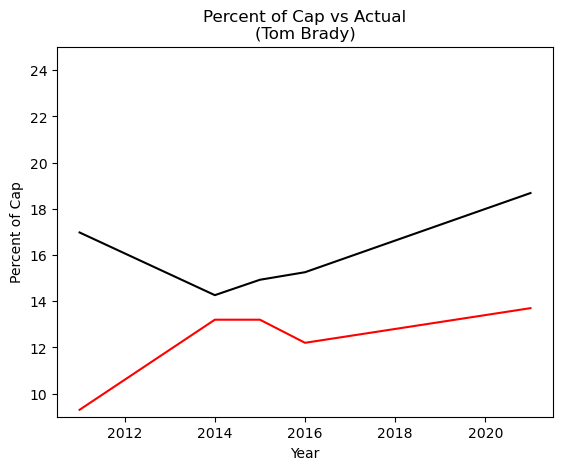

In [167]:
sns.lineplot(data = train[train.index =="Tom Brady"] , y = 'predicted', x = 'year', color = 'black', label='Predicted', legend=False)
sns.lineplot(data = train[train.index =="Tom Brady"] , y = 'percent_of_cap', x = 'year', color = 'red', label='Actual', legend=False)
plt.ylabel('Percent of Cap')
plt.xlabel('Year')
plt.title('Percent of Cap vs Actual\n(Tom Brady)')
plt.ylim(9, 25)

plt.show()

In [84]:
def year_converter(x):
    return int(x)

train.year = train.year.apply(year_converter)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, Blake Bortles to Ryan Fitzpatrick
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             246 non-null    object 
 1   year             246 non-null    int64  
 2   games_played     246 non-null    float64
 3   comp             246 non-null    float64
 4   att              246 non-null    float64
 5   comp_pct         246 non-null    float64
 6   yds              246 non-null    float64
 7   avg_yds_per_att  246 non-null    float64
 8   td               246 non-null    float64
 9   int              246 non-null    float64
 10  pass_rating      246 non-null    float64
 11  rush_att         246 non-null    float64
 12  rush_yds         246 non-null    float64
 13  rush_avg         246 non-null    float64
 14  rush_td          246 non-null    float64
 15  full_name        246 non-null    object 
 16  year_signed      246 non-null    int64  
 

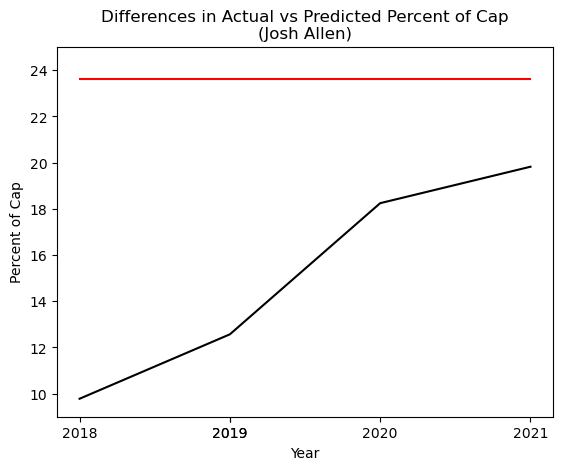

In [100]:
sns.lineplot(data = train[train.index =="Josh Allen"] , y = 'predicted', x = 'year', color = 'black')
sns.lineplot(data = train[train.index =="Josh Allen"] , y = 'percent_of_cap', x = 'year', color='red')
plt.ylabel('Percent of Cap')
plt.xlabel('Year')
plt.title('Differences in Actual vs Predicted Percent of Cap\n(Josh Allen)')
plt.ylim(9, 25)
custom_xticks = [2018, 2019, 2020, 2021, 2019]
plt.xticks(custom_xticks)
plt.show()

([<matplotlib.axis.XTick at 0x17de4d130>,
 [Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2019, 0, '2019')])

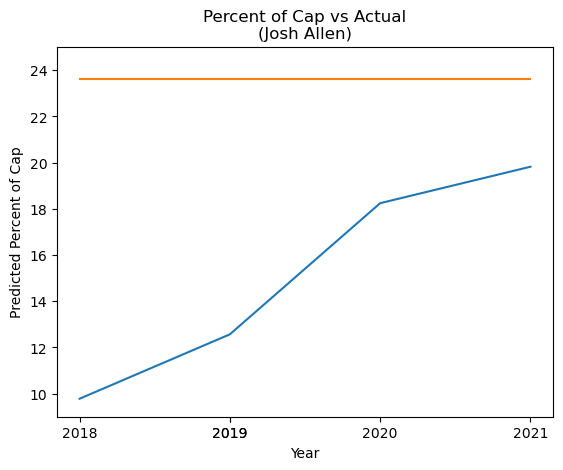

In [91]:
sns.lineplot(data = train[train.index =="Josh Allen"] , y = 'predicted', x = 'year')
sns.lineplot(data = train[train.index =="Josh Allen"] , y = 'percent_of_cap', x = 'year')
plt.ylabel('Predicted Percent of Cap')
plt.xlabel('Year')
plt.title('Differences in Actual vs Predicted Percent of Cap\n(Josh Allen)')
plt.ylim(9, 25)
custom_xticks = [2018, 2019, 2020, 2021, 2019]
plt.xticks(custom_xticks)

In [170]:
from sklearn.cluster import DBSCAN
import numpy as np

In [171]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_train)

DBSCAN()

In [173]:
cluster_assignments = dbscan_model.labels_

In [174]:
cluster_assignments

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [176]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_assignments, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)